In [ ]:
# Decision Tree

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
linkData ='https://raw.githubusercontent.com/DUanalytics/datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(linkData)
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age' , 'label']
df.columns = col_names
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# feature columns and target columns
feature_columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age' ]
X = df[feature_columns]
y = df.label
X, y

(     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
 0           6      148  72    35        0  33.6     0.627   50
 1           1       85  66    29        0  26.6     0.351   31
 2           8      183  64     0        0  23.3     0.672   32
 3           1       89  66    23       94  28.1     0.167   21
 4           0      137  40    35      168  43.1     2.288   33
 ..        ...      ...  ..   ...      ...   ...       ...  ...
 763        10      101  76    48      180  32.9     0.171   63
 764         2      122  70    27        0  36.8     0.340   27
 765         5      121  72    23      112  26.2     0.245   30
 766         1      126  60     0        0  30.1     0.349   47
 767         1       93  70    31        0  30.4     0.315   23
 
 [768 rows x 8 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: label, Length: 768, dtype: int64)

In [9]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state=1)
# 70% to training the model

In [14]:
#print(X_train)
#print(X_test)
print(X_train.shape, X_test.shape)
print(231/768)  #.3

(537, 8) (231, 8)
0.30078125


In [15]:
# Model
from sklearn.tree import DecisionTreeClassifier

In [31]:
#clf = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(max_depth=3)
clf1 = clf1.fit(X_train, y_train)
print(clf1)

DecisionTreeClassifier(max_depth=3)


In [32]:
y_pred1 = clf1.predict(X_test)
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0]


In [33]:
clf1.predict_proba(X_test)

array([[0.94736842, 0.05263158],
       [0.52941176, 0.47058824],
       [0.98901099, 0.01098901],
       [0.61428571, 0.38571429],
       [0.85833333, 0.14166667],
       [0.85833333, 0.14166667],
       [0.61428571, 0.38571429],
       [0.98901099, 0.01098901],
       [0.61428571, 0.38571429],
       [0.85833333, 0.14166667],
       [0.42045455, 0.57954545],
       [0.98901099, 0.01098901],
       [0.125     , 0.875     ],
       [0.42045455, 0.57954545],
       [0.66666667, 0.33333333],
       [0.125     , 0.875     ],
       [0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [0.98901099, 0.01098901],
       [0.85833333, 0.14166667],
       [0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [0.125     , 0.875     ],
       [0.61428571, 0.38571429],
       [0.85833333, 0.14166667],
       [0.61428571, 0.38571429],
       [0.61428571, 0.38571429],
       [0.125     , 0.875     ],
       [0.85833333, 0.14166667],
       [0.42045455, 0.57954545],
       [0.

In [34]:
# Accuracy/ Evaluate
from sklearn import metrics

In [35]:
print( 'Accuracy', metrics.accuracy_score(y_test, y_pred1))
#above .5 can be considered good

Accuracy 0.7575757575757576


[Text(0.5, 0.875, 'glucose <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]\nclass = ND'),
 Text(0.25, 0.625, 'bmi <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]\nclass = ND'),
 Text(0.125, 0.375, 'bmi <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]\nclass = ND'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = ND'),
 Text(0.1875, 0.125, 'gini = 0.022\nsamples = 91\nvalue = [90, 1]\nclass = ND'),
 Text(0.375, 0.375, 'age <= 27.5\ngini = 0.397\nsamples = 260\nvalue = [189, 71]\nclass = ND'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]\nclass = ND'),
 Text(0.4375, 0.125, 'gini = 0.474\nsamples = 140\nvalue = [86, 54]\nclass = ND'),
 Text(0.75, 0.625, 'bmi <= 27.85\ngini = 0.478\nsamples = 180\nvalue = [71, 109]\nclass = D'),
 Text(0.625, 0.375, 'glucose <= 145.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]\nclass = ND'),
 Text(0.5625, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = ND'),
 Text(0.6875, 0.125

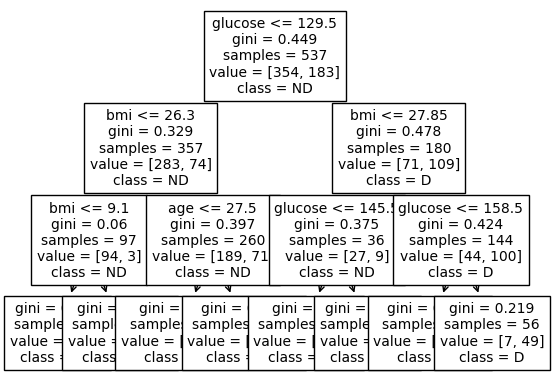

In [37]:
from sklearn import tree
tree.plot_tree(clf1, fontsize=10, feature_names=feature_columns,  class_names=['ND','D'])

In [39]:
#install this libraries for visualisation
#!pip install graphviz
#!pip install pydotplus
# install graphviz from http://www.graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + r'E:\analytics\Graphviz\bin'
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [40]:
#Visualise
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

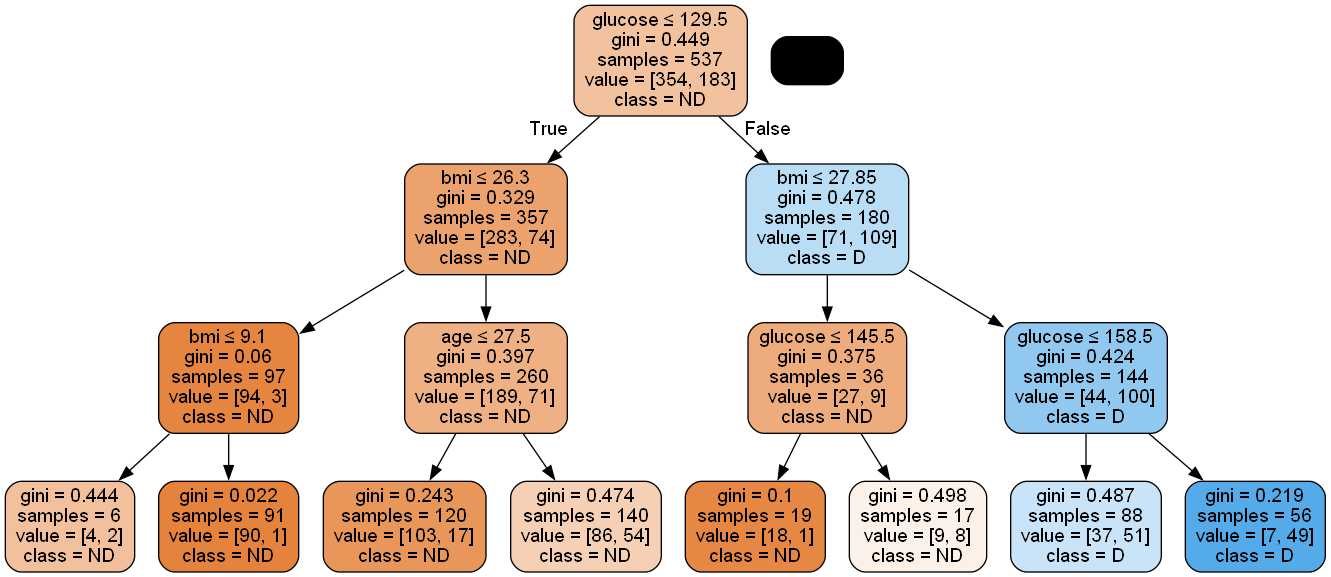

In [42]:
dot_data1 = StringIO()
export_graphviz(clf1, out_file=dot_data1, filled=True, rounded=True, special_characters=True, feature_names = feature_columns,   class_names = ['ND','D'])
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph1.write_png('diabetes1.png')
Image(graph1.create_png())

In [55]:
trainXy = pd.concat([X_train, y_train], axis=1)
trainXy.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
88,15,136,70,32,110,37.1,0.153,43,1
467,0,97,64,36,100,36.8,0.600,25,0
550,1,116,70,28,0,27.4,0.204,21,0
147,2,106,64,35,119,30.5,1.400,34,0
481,0,123,88,37,0,35.2,0.197,29,0


In [65]:
#trainXy.loc[(trainXy['glucose'] <= 129.5) & (trainXy['bmi'] <= 9.1),]
#trainXy.loc[(trainXy['glucose'] <= 129.5) & (trainXy['bmi'] > 9.1) & (trainXy['bmi'] <= 26.3),].shape
#trainXy.loc[(trainXy['glucose'] <= 129.5) & (trainXy['bmi'] > 9.1) & (trainXy['bmi'] <= 26.3),].groupby('label', as_index=False).size()
trainXy.loc[(trainXy['glucose'] <= 129.5) & (trainXy['age'] <= 27.5) & (trainXy['bmi'] > 26.3),].shape
trainXy.loc[(trainXy['glucose'] <= 129.5) & (trainXy['age'] <= 27.5) & (trainXy['bmi'] > 26.3),].groupby('label', as_index=False).size()

,label,size
0,0,103
1,1,17


In [ ]:
# optimising the tree : 2nd Model

In [66]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
clf2 = clf2.fit(X_train, y_train)
print(clf2)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [67]:
y_pred2 = clf2.predict(X_test)
print( 'Accuracy-2', metrics.accuracy_score(y_test, y_pred2))
# .75

Accuracy-2 0.7705627705627706


In [68]:
metrics.accuracy_score(y_test, y_pred1) < metrics.accuracy_score(y_test, y_pred2)
#2nd model is better if True

True

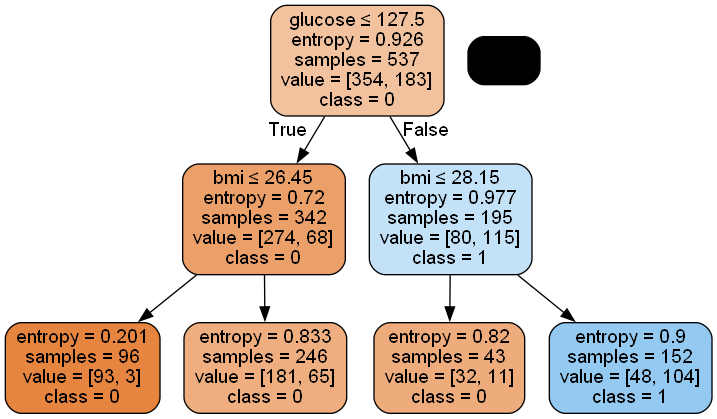

In [69]:
dot_data2 = StringIO()
export_graphviz(clf2, out_file=dot_data2, filled=True, rounded=True,   special_characters=True, feature_names = feature_columns, 
                class_names = ['0','1'])
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())
graph2.write_png('diabetes2.png')
Image(graph2.create_png())

## Interpretation
Pros
DT are easy to interpret
Requires fewer data pre-processing  (no need to normalise)
Can be used for feature engineering (predicting missing values, variable selection)
No assumption about distribution becoz of non-parametric nature of algo

Cons
Sensitive to noisy data. can overfit noisy data
Small variations can result in different DT. Can be reduced by bagging & boosting 
DT are biased with imbalanced dataset. (so balance the dataset)
